# Descriptive analyis: Two months

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.corpora.dictionary import Dictionary
from gensim import corpora, models, similarities
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(style="darkgrid", color_codes=True)
import re
from collections import Counter

In [4]:
# read data
df = pd.read_csv('data/two_months.csv')
df.columns = list(df.columns.str.lower())

# Text: The best of being outside

In [97]:
text = df['p1'].str.cat(sep=' ').lower()

In [98]:
text = re.sub(r'hija\b|hijas\b|hijo\b', 'hijos', text)
text = re.sub(r'nan', '', text)

In [99]:
stop = stopwords.words('spanish')

In [100]:
stop.extend(['sido', 'pude', 'mas', 'poder','estan', 'encontrar', 'ni'])

In [102]:
tokens  = [w for w in word_tokenize(text.lower()) if w.isalpha()]
no_stops = [t for t in tokens if t not in stop]
dictionary = Dictionary([no_stops])

counter = Counter(no_stops)

words = counter.keys()
counts = counter.values()

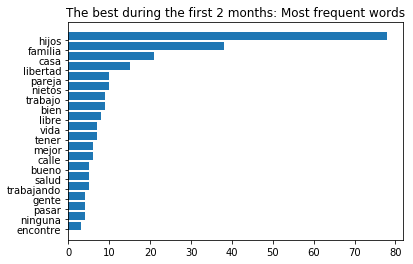

In [103]:
# frequency plot
labels, values = zip(*counter.items())
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort][0:20]
values = np.array(values)[indSort][0:20]

indexes = np.arange(len(labels))
bar_width = 0.35
plt.barh(indexes, values);
plt.yticks(indexes + bar_width, labels)
plt.gca().invert_yaxis()
plt.title('The best during the first 2 months: Most frequent words');

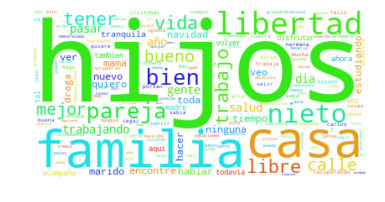

In [104]:
wordcloud = WordCloud().generate(text.lower())

wc = WordCloud(background_color = 'white', max_words = 500, stopwords = stop).generate(text.lower())

plt.imshow(wc, interpolation='bilinear')
plt.axis("off");
plt.savefig('plots/asp_positivos_wordcloud_dos_meses.pdf',  bbox_inches='tight', dpi=600)

# Text: The most difficult of being outside



In [40]:
text = df['p2'].str.cat(sep=' ').lower()
text = re.sub(r'hija\b|hijas\b|hijo\b', 'hijos', text)
text = re.sub(r'droga\b', 'drogas', text)
text = re.sub(r'nan', '', text)

In [45]:
stop = stopwords.words('spanish')
stop.extend(['sido', 'pude', 'mas', 'poder', 'estan', 'dificil'])

In [46]:
tokens  = [w for w in word_tokenize(text.lower()) if w.isalpha()]
no_stops = [t for t in tokens if t not in stop]
dictionary = Dictionary([no_stops])

counter = Counter(no_stops)

words = counter.keys()
counts = counter.values()

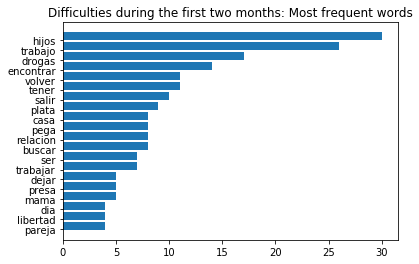

In [47]:
# frequency plot
labels, values = zip(*counter.items())
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort][0:20]
values = np.array(values)[indSort][0:20]

indexes = np.arange(len(labels))
bar_width = 0.35
plt.barh(indexes, values);
plt.yticks(indexes + bar_width, labels)
plt.gca().invert_yaxis()
plt.title('Difficulties during the first two months: Most frequent words');

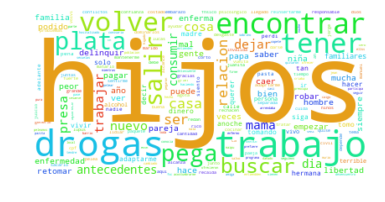

In [48]:
wordcloud = WordCloud().generate(text.lower())

wc = WordCloud(background_color = 'white', max_words = 500, stopwords = stop).generate(text.lower())

plt.imshow(wc, interpolation='bilinear')
plt.axis("off");
plt.savefig('plots/dificultades_wordcloud_dos_meses.pdf', bbox_inches='tight', dpi=600)

# Mental Health

One item was excluded during the baseline.

In [53]:
mh = df.loc[:, 'salud_mental_1':'salud_mental_90'] # only 89 items

In [54]:
mh.replace(-9, np.nan, inplace=True)

In [57]:
mh['score_mh'] = mh.mean(axis=1)

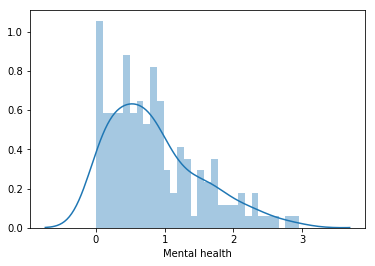

In [78]:
sns.distplot(mh['score_mh'].dropna(), hist=True, bins=30)
plt.xlabel('Mental health');

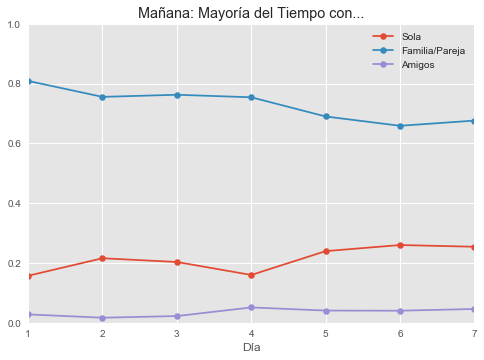

In [163]:
# company
variables = ['p18_b_dia', 'p18_b_dia', 'p18_b_dia']
labels = ['Sola', 'Familia/Pareja', 'Amigos']
toreplace = [{0:1, 1:0, 2:0, 3:0, 4:0, -8:np.nan, -9: np.nan}, {0:0, 1:1, 2:0, 3:1, 4:0, -8:np.nan, -9: np.nan},
             {0:0, 1:0, 2:1, 3:0, 4:0, -8:np.nan, -9: np.nan}]
title = 'Mañana: Mayoría del Tiempo con...'
ylim = [0,1]
plot = create_plot_day(data=fw, variables = variables, labels = labels, toreplace = toreplace, title = title, ylim = ylim)
plot.savefig('plots/manana_tiempo.pdf', bbox_inches='tight', dpi=600)

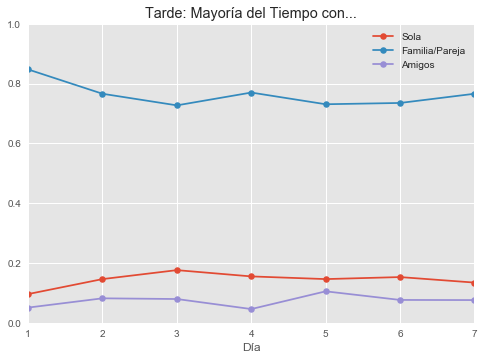

In [164]:
variables = ['p19_b_dia', 'p19_b_dia', 'p19_b_dia']
labels = ['Sola', 'Familia/Pareja', 'Amigos']
toreplace = [{0:1, 1:0, 2:0, 3:0, 4:0, -8:np.nan, -9: np.nan}, {0:0, 1:1, 2:0, 3:1, 4:0, -8:np.nan, -9: np.nan},
             {0:0, 1:0, 2:1, 3:0, 4:0, -8:np.nan, -9: np.nan}]
title = 'Tarde: Mayoría del Tiempo con...'
ylim = [0,1]
plot = create_plot_day(data=fw, variables = variables, labels = labels, toreplace = toreplace, title = title, ylim = ylim)
plot.savefig('plots/tarde_tiempo.pdf', bbox_inches='tight', dpi=600)

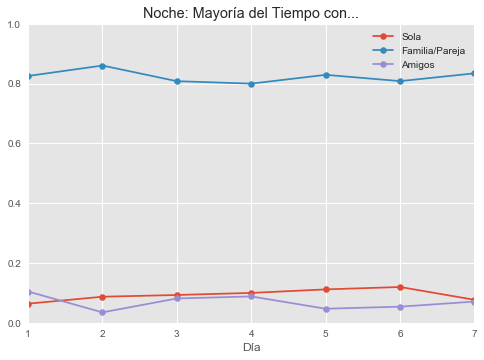

In [165]:
variables = ['p20_b_dia', 'p20_b_dia', 'p20_b_dia']
labels = ['Sola', 'Familia/Pareja', 'Amigos']
toreplace = [{0:1, 1:0, 2:0, 3:0, 4:0, -8:np.nan, -9: np.nan}, {0:0, 1:1, 2:0, 3:1, 4:0, -8:np.nan, -9: np.nan},
             {0:0, 1:0, 2:1, 3:0, 4:0, -8:np.nan, -9: np.nan}]
title = 'Noche: Mayoría del Tiempo con...'
ylim = [0,1]
plot = create_plot_day(data=fw, variables = variables, labels = labels, toreplace = toreplace, title = title, ylim = ylim);
plot.savefig('plots/noche_tiempo.pdf', bbox_inches='tight', dpi=600);